# Working with arrays

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
#dataset definition
dataset=np.array([[3,4],[3,4],[3,4]])
print(dataset)
print(dataset.shape)

[[3 4]
 [3 4]
 [3 4]]
(3, 2)


In [2]:
#performing a feature transform on the dataset
t=PolynomialFeatures(degree=2)
t_dataset=t.fit_transform(dataset)
print(t_dataset)
print(t_dataset.shape)

[[ 1.  3.  4.  9. 12. 16.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  3.  4.  9. 12. 16.]]
(3, 6)


Working with a dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

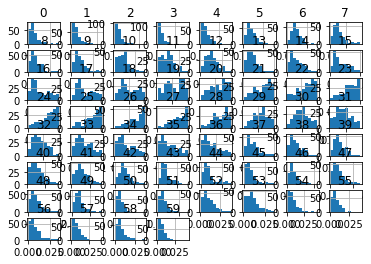

In [3]:
# load and summarize the sonar dataset
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
data = pd.read_csv(url, header=None)
# summarize the shape of the dataset
print(data.shape)
# summarize each variable
print(data.describe())
# histograms of the variables
data.hist()
pyplot.show()

In [4]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype(float)
y = LabelEncoder().fit_transform(y.astype(object))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


# Polynomial Feature Transform Example

In [5]:
# perform a polynomial features transform of the dataset
try:
    trans = PolynomialFeatures(degree=3) 
    data = trans.fit_transform(data)
except ValueError:
    pass

In [6]:
# visualize a polynomial features transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)

(208, 39711)


In [7]:
# Applying the above KNN model on the Polynomial Features Dataset
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


It can be seen from that the polynomial features transform results in a lift in performance

We can now look at the effect of degree on the model:

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376


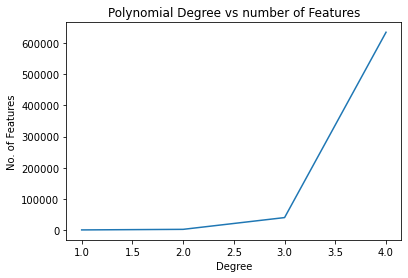

In [5]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    # load dataset
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
    dataset = read_csv(url, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype(float)
    y = LabelEncoder().fit_transform(y.astype(object))
    return X, y
 
# define dataset
X, y = get_dataset()
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 5)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # record number of features
    num_features.append(data.shape[1])
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plotting Degree vs num_features
pyplot.plot(degress, num_features)
pyplot.title('Polynomial Degree vs number of Features')
pyplot.xlabel('Degree')
pyplot.ylabel('No. of Features')
pyplot.show()

Exploring degree value that best fits the dataset

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)


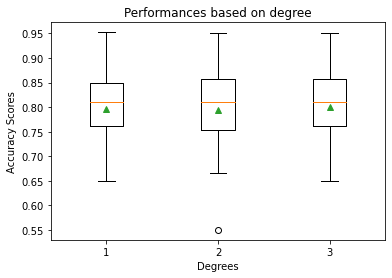

In [2]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    # load dataset
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
    dataset = read_csv(url, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype(float)
    y = LabelEncoder().fit_transform(y.astype(object))
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1,4):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Performances based on degree')
pyplot.xlabel('Degrees')
pyplot.ylabel('Accuracy Scores')
pyplot.show()